# **Netflix Movies and TV Shows Analysis**

## Objectives
The objectives of this project are to analyse Netflix content data to gain insights into:

- Distribution of content types (Movies vs TV Shows) on Netflix.
- Popularity and distribution of different genres.
- Regional differences in Netflix content production.
- Trends in release years and durations.
- Impact of ratings and other features on the content catalogue.

These objectives will be achieved through the following activities:

- Fetching and loading the Netflix dataset from Kaggle.
- Data cleaning and preprocessing.
- Exploratory Data Analysis (EDA) to understand data distribution.
- Creating visualisations using Python libraries such as Matplotlib, Seaborn, and Plotly.
- Drawing insights from various charts and graphs.
- Using Power BI for further data exploration and dashboarding.

## Inputs
- Dataset: Netflix Shows data from Kaggle (`netflix_titles.csv` or equivalent)
- Libraries: NumPy, Pandas, Matplotlib, Seaborn, Plotly

## Outputs
- Cleaned and processed dataset ready for analysis.
- Exploratory Data Analysis (EDA) including visualizations.
- Insights on content distribution by type, genre, country, release year, and ratings.
- Interactive charts and dashboards for presenting findings.

---

# Hypotheses and Validation

### Hypothesis 1: Content Added by Month or Year (Trend)  
*The total amount of content added on Netflix varies over time, showing identifiable trends by month and year.*

**Validation:**  
- Extract month and year from the `date_added` column.  
- Aggregate counts of shows added by month and year.  
- Use Seaborn line plots to visualise trends over months and years, highlighting both seasonal patterns and long-term growth.


### Hypothesis 2: Compare Movies vs TV Programmes Growth  
*The number of movies and TV programmes added to Netflix grows at different rates over the years.*

**Validation:**  
- Extract the year from the `date_added` column.  
- Group data by content type (`Movie` or `TV Show`) and year added.  
- Use a Matplotlib line chart to compare yearly counts of movies and TV programmes.


### Hypothesis 3: Top Countries by Content Count  
*Certain countries contribute significantly more content to Netflix's library.*

**Validation:**  
- Group data by the `country` column and count shows.  
- Use a Plotly interactive bar chart or map to visualise top contributing countries.


### Hypothesis 4: Top Genres on Netflix  
*Some genres dominate the Netflix catalogue more than others.*

**Validation:**  
- Use the `genre` column (originally `listed_in`) as categories.  
- Count the number of shows in each genre.  
- Visualise the most common genres with a Seaborn bar chart.




---

# Section 1 - Extracting the data

In this section, I:

- Imported all required Python libraries for data analysis and visualisation (pandas, NumPy, matplotlib, seaborn, plotly)
- Loaded the dataset from the data folder
- Displayed the first few rows of the dataset to understand its structure
- Checked the column types and number of non-null values using .info()
- Used .describe() to get summary statistics of numeric variables

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Extract the data

In [2]:
df = pd.read_csv('../data/netflix_titles.csv')
# Display the first few rows of the dataframe
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Find out basic information about the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# Display basic statistics of the dataframe
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


---

# Section 2 - Transforming Data

In this section, I performed data cleaning and preparation:

- Handled missing values and incorrect formats
- Extracted new columns
- Standardised columns like duration and genre
- Exported the cleaned data for Power BI and Python visualisation

In [5]:
df.isnull().sum() # Check for missing values in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
int(df.duplicated().sum()) # Check for duplicate rows

0

In [7]:
#Replace missing values in 'director' and 'cast', 'country' with 'Unknown'
df.fillna({
    'director': 'Unknown',
    'cast': 'Unknown',
    'country': 'Unknown'
}, inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
# Convert 'date_added' to datetime format using mixed format to handle inconsistencies
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

# Drop rows with missing values in 'release_year'
df.dropna(subset=['release_year'], inplace=True)

# Drop rows with missing date_added (only 10 rows)
df.dropna(subset=['date_added'], inplace=True)

# Drop unnecessary columns
df.drop(columns=['show_id', 'description'], inplace=True)
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies"


In [9]:
# Add columns for date
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month # Extract month
df['month_name_added']=df['date_added'].dt.month_name() # Extract month name
df['year_added'] = df['date_added'].dt.year # Extract year
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,9,September,2021
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",9,September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,September,2021
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",9,September,2021
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9,September,2021


In [10]:
# Fill missing values in 'rating' with mode
df.fillna({
    'rating': df['rating'].mode()[0]
}, inplace=True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,9,September,2021
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",9,September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,September,2021
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",9,September,2021
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9,September,2021


In [11]:
df = df.rename(columns={'listed_in': 'genre'}) # Rename column
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,month_added,month_name_added,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,9,September,2021
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",9,September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,September,2021
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",9,September,2021
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9,September,2021


In [12]:
# Analyse duration formats and potential data issues
# Copilot came up with this code
print("Duration format analysis:")
print("\nMovie duration samples:")
movie_durations = df[df['type'] == 'Movie']['duration'].dropna()
print(movie_durations.head(10).tolist())

print("\nTV Show duration samples:")
tv_durations = df[df['type'] == 'TV Show']['duration'].dropna()
print(tv_durations.head(10).tolist())

print("\nUnique duration patterns:")
unique_durations = df['duration'].dropna().unique()
print(f"Total unique duration values: {len(unique_durations)}")
print("First 15 unique duration values:")
print(unique_durations[:15])

# Check for any unusual patterns
# Copilot came up with this code
print("\nChecking for unusual duration patterns:")
unusual_durations = [d for d in unique_durations if not any(x in str(d) for x in ['min', 'Season'])]
if unusual_durations:
    print("Unusual duration patterns found:", unusual_durations)
else:
    print("All duration patterns look normal (contain 'min' or 'Season')")

Duration format analysis:

Movie duration samples:
['90 min', '91 min', '125 min', '104 min', '127 min', '91 min', '67 min', '94 min', '161 min', '61 min']

TV Show duration samples:
['2 Seasons', '1 Season', '1 Season', '2 Seasons', '1 Season', '9 Seasons', '1 Season', '1 Season', '1 Season', '4 Seasons']

Unique duration patterns:
Total unique duration values: 220
First 15 unique duration values:
['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min']

Checking for unusual duration patterns:
All duration patterns look normal (contain 'min' or 'Season')


---

# Section 3 – Data Visualisation

This section presents visual analyses of the Netflix Shows dataset to uncover patterns and insights related to content trends, types, geography, and genres. By employing a variety of graphical techniques using Python libraries such as Matplotlib, Seaborn, and Plotly, we aim to make the data more accessible and interpretable.

The visualisations will help validate our hypotheses by revealing temporal trends, comparing different content types, highlighting key countries contributing to Netflix's library, and showcasing the most popular genres. Through these graphical representations, complex data becomes clearer, aiding decision-making and deeper understanding.


In [13]:
# Count content types
type_counts = df['type'].value_counts()

# Create pie chart
fig = px.pie(
    names=type_counts.index,
    values=type_counts.values,
    color=type_counts.index,
    color_discrete_map={"Movie": "#e64b30", "TV Show": "#4d3130"},
    title="Content Type Distribution on Netflix"
)

fig.show()

Content Type Distribution on Netflix
This pie chart shows the breakdown of Netflix content by type: Movies and TV Shows. It reveals that Movies make up the larger portion of the catalogue compared to TV Shows. This suggests that Netflix has historically focused more on acquiring or producing movies, although TV Shows still represent a significant part of the library. Understanding this balance helps us see the overall content strategy and viewer options available on the platform.

### Hypothesis 1: Content Added by Month and Year (Trend)

*The total amount of content added on Netflix varies over time, showing identifiable trends by month and year.*

**Validation:**  
- Use the existing `month_name_added`, and `year_added` columns.  
- Aggregate counts of shows added by month (using month names) and year.  
- Use Seaborn line plots to visualise trends over months and years, highlighting both seasonal patterns and long-term growth.

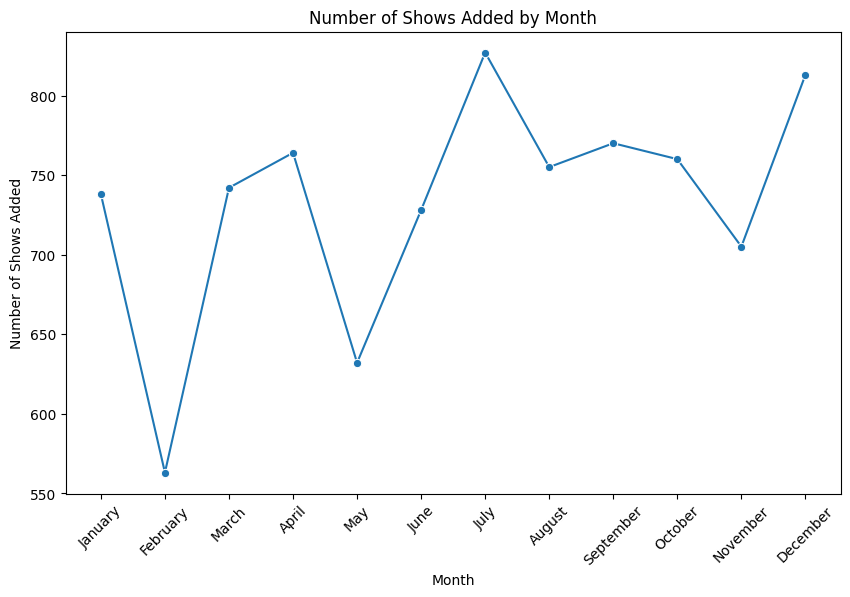

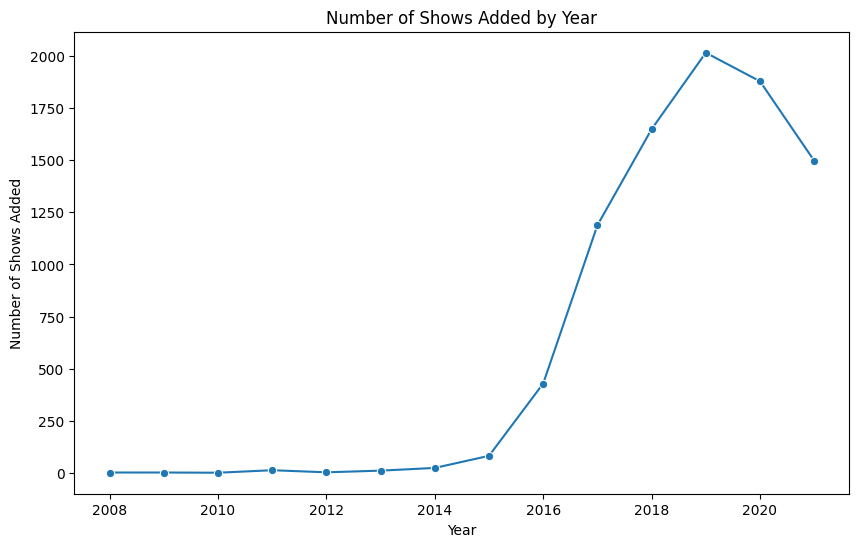

In [14]:
# Aggregate counts by month name and year
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

monthly_counts_by_name = df.dropna(subset=['month_name_added']).groupby('month_name_added').size()
monthly_counts_by_name = monthly_counts_by_name.reindex(months_order)

yearly_counts = df.dropna(subset=['year_added']).groupby('year_added').size()

# Plot monthly trend with month names
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_counts_by_name.index, y=monthly_counts_by_name.values, marker='o')
plt.title('Number of Shows Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Shows Added')
plt.xticks(rotation=45)
plt.show()

# Plot yearly trend
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title('Number of Shows Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows Added')
plt.show()



### Insights from Hypothesis 1: Content Added Over Time

The analysis looked at how many new titles were added to Netflix each month and each year. The line charts show clear patterns in the data:

- **Monthly Trends:** Certain months, such as July and December, have notably higher numbers of titles added, possibly linked to holiday seasons or special promotions. February tends to have fewer additions.
- **Yearly Trends:** There is a steady increase in content added from earlier years up to around 2018-2019, showing Netflix’s expansion in content acquisition or production. After this peak, the number of new titles added each year shows a slight decline, which could reflect changes in strategy or market conditions.

These trends help us understand when Netflix most actively grows its library and reveal possible seasonal or business cycle influences on content release.

### Hypothesis 2: Compare Movies vs TV Programmes Growth  

*The number of movies and TV programmes added to Netflix grows at different rates over the years.*

**Validation:**  
- Extract the year from the `date_added` column.  
- Group data by content type (`Movie` or `TV Show`) and year added.  
- Use a **Matplotlib line chart** to compare yearly counts of movies and TV programmes.

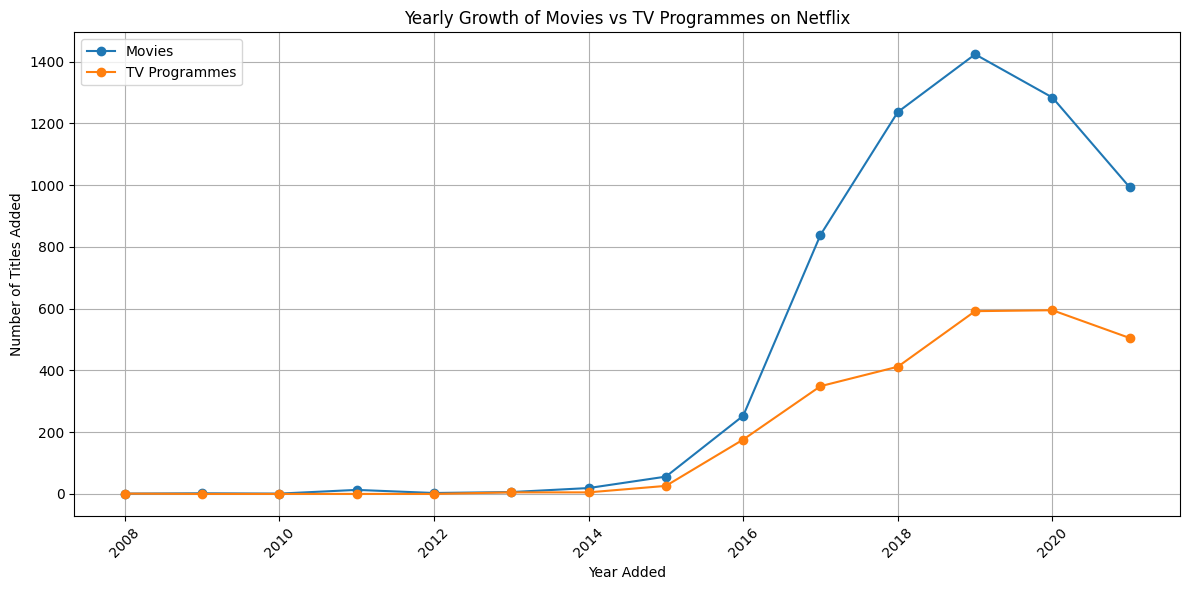

In [15]:
# Group data by 'type' and 'year_added' and count entries
yearly_counts = df.groupby(['type', 'year_added']).size().reset_index(name='count')

# Pivot the data so we have years as x-axis and types as columns
pivot_counts = yearly_counts.pivot(index='year_added', columns='type', values='count').fillna(0)

# Plotting with Matplotlib
plt.figure(figsize=(12,6))
plt.plot(pivot_counts.index, pivot_counts['Movie'], marker='o', label='Movies')
plt.plot(pivot_counts.index, pivot_counts['TV Show'], marker='o', label='TV Programmes')

plt.title('Yearly Growth of Movies vs TV Programmes on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights from Hypothesis 2: Growth of Movies vs TV Programmes

The yearly growth trends of movies and TV programmes on Netflix show clear differences:

- Movies have generally been added in larger numbers compared to TV programmes each year.
- There was a steady increase in both movies and TV shows from the early years up until around 2018-2019.
- Movies saw a notable surge in additions between 2016 and 2019, peaking before experiencing a decline from 2020 onwards.
- TV programmes also grew but at a slower, more consistent rate; however, they too experienced a decrease in new titles after 2019.
- This decline in recent years might be linked to external factors like changes in production schedules, global events affecting filming (e.g., the COVID-19 pandemic), or a strategic shift in content acquisition by Netflix.
- The data suggests Netflix prioritised expanding its movie catalogue earlier, with a more balanced approach or reduced output for both content types more recently.

The line plot clearly visualises these trends, helping to understand how content strategy and market conditions impact Netflix's evolving library.

### Hypothesis 3: Top Countries by Content Count  
*Certain countries contribute significantly more content to Netflix's library.*

**Validation:**  
- Extract and split countries from the `country` column (which may contain multiple countries per entry).  
- Count the total number of titles per country.  
- Visualise the distribution on a Plotly choropleth world map and a horizontal bar chart showing the top 15 contributing countries.

In [16]:
# Full country_codes dictionary
country_codes = {
    'afghanistan': 'AFG',
    'albania': 'ALB',
    'algeria': 'DZA',
    'american samoa': 'ASM',
    'andorra': 'AND',
    'angola': 'AGO',
    'anguilla': 'AIA',
    'antigua and barbuda': 'ATG',
    'argentina': 'ARG',
    'armenia': 'ARM',
    'aruba': 'ABW',
    'australia': 'AUS',
    'austria': 'AUT',
    'azerbaijan': 'AZE',
    'bahamas': 'BHM',
    'bahrain': 'BHR',
    'bangladesh': 'BGD',
    'barbados': 'BRB',
    'belarus': 'BLR',
    'belgium': 'BEL',
    'belize': 'BLZ',
    'benin': 'BEN',
    'bermuda': 'BMU',
    'bhutan': 'BTN',
    'bolivia': 'BOL',
    'bosnia and herzegovina': 'BIH',
    'botswana': 'BWA',
    'brazil': 'BRA',
    'british virgin islands': 'VGB',
    'brunei': 'BRN',
    'bulgaria': 'BGR',
    'burkina faso': 'BFA',
    'burma': 'MMR',
    'burundi': 'BDI',
    'cabo verde': 'CPV',
    'cambodia': 'KHM',
    'cameroon': 'CMR',
    'canada': 'CAN',
    'cayman islands': 'CYM',
    'central african republic': 'CAF',
    'chad': 'TCD',
    'chile': 'CHL',
    'china': 'CHN',
    'colombia': 'COL',
    'comoros': 'COM',
    'congo democratic': 'COD',
    'congo republic': 'COG',
    'cook islands': 'COK',
    'costa rica': 'CRI',
    "cote d'ivoire": 'CIV',
    'croatia': 'HRV',
    'cuba': 'CUB',
    'curacao': 'CUW',
    'cyprus': 'CYP',
    'czech republic': 'CZE',
    'denmark': 'DNK',
    'djibouti': 'DJI',
    'dominica': 'DMA',
    'dominican republic': 'DOM',
    'ecuador': 'ECU',
    'egypt': 'EGY',
    'el salvador': 'SLV',
    'equatorial guinea': 'GNQ',
    'eritrea': 'ERI',
    'estonia': 'EST',
    'ethiopia': 'ETH',
    'falkland islands': 'FLK',
    'faroe islands': 'FRO',
    'fiji': 'FJI',
    'finland': 'FIN',
    'france': 'FRA',
    'french polynesia': 'PYF',
    'gabon': 'GAB',
    'gambia, the': 'GMB',
    'georgia': 'GEO',
    'germany': 'DEU',
    'ghana': 'GHA',
    'gibraltar': 'GIB',
    'greece': 'GRC',
    'greenland': 'GRL',
    'grenada': 'GRD',
    'guam': 'GUM',
    'guatemala': 'GTM',
    'guernsey': 'GGY',
    'guinea-bissau': 'GNB',
    'guinea': 'GIN',
    'guyana': 'GUY',
    'haiti': 'HTI',
    'honduras': 'HND',
    'hong kong': 'HKG',
    'hungary': 'HUN',
    'iceland': 'ISL',
    'india': 'IND',
    'indonesia': 'IDN',
    'iran': 'IRN',
    'iraq': 'IRQ',
    'ireland': 'IRL',
    'isle of man': 'IMN',
    'israel': 'ISR',
    'italy': 'ITA',
    'jamaica': 'JAM',
    'japan': 'JPN',
    'jersey': 'JEY',
    'jordan': 'JOR',
    'kazakhstan': 'KAZ',
    'kenya': 'KEN',
    'kiribati': 'KIR',
    'north korea': 'PRK',
    'south korea': 'KOR',
    'kosovo': 'KSV',
    'kuwait': 'KWT',
    'kyrgyzstan': 'KGZ',
    'laos': 'LAO',
    'latvia': 'LVA',
    'lebanon': 'LBN',
    'lesotho': 'LSO',
    'liberia': 'LBR',
    'libya': 'LBY',
    'liechtenstein': 'LIE',
    'lithuania': 'LTU',
    'luxembourg': 'LUX',
    'macau': 'MAC',
    'macedonia': 'MKD',
    'madagascar': 'MDG',
    'malawi': 'MWI',
    'malaysia': 'MYS',
    'maldives': 'MDV',
    'mali': 'MLI',
    'malta': 'MLT',
    'marshall islands': 'MHL',
    'mauritania': 'MRT',
    'mauritius': 'MUS',
    'mexico': 'MEX',
    'micronesia': 'FSM',
    'moldova': 'MDA',
    'monaco': 'MCO',
    'mongolia': 'MNG',
    'montenegro': 'MNE',
    'morocco': 'MAR',
    'mozambique': 'MOZ',
    'namibia': 'NAM',
    'nepal': 'NPL',
    'netherlands': 'NLD',
    'new caledonia': 'NCL',
    'new zealand': 'NZL',
    'nicaragua': 'NIC',
    'nigeria': 'NGA',
    'niger': 'NER',
    'niue': 'NIU',
    'northern mariana islands': 'MNP',
    'norway': 'NOR',
    'oman': 'OMN',
    'pakistan': 'PAK',
    'palau': 'PLW',
    'panama': 'PAN',
    'papua new guinea': 'PNG',
    'paraguay': 'PRY',
    'peru': 'PER',
    'philippines': 'PHL',
    'poland': 'POL',
    'portugal': 'PRT',
    'puerto rico': 'PRI',
    'qatar': 'QAT',
    'romania': 'ROU',
    'russia': 'RUS',
    'rwanda': 'RWA',
    'saint kitts and nevis': 'KNA',
    'saint lucia': 'LCA',
    'saint martin': 'MAF',
    'saint pierre and miquelon': 'SPM',
    'saint vincent and the grenadines': 'VCT',
    'samoa': 'WSM',
    'san marino': 'SMR',
    'sao tome and principe': 'STP',
    'saudi arabia': 'SAU',
    'senegal': 'SEN',
    'serbia': 'SRB',
    'seychelles': 'SYC',
    'sierra leone': 'SLE',
    'singapore': 'SGP',
    'sint maarten': 'SXM',
    'slovakia': 'SVK',
    'slovenia': 'SVN',
    'solomon islands': 'SLB',
    'somalia': 'SOM',
    'south africa': 'ZAF',
    'south sudan': 'SSD',
    'spain': 'ESP',
    'sri lanka': 'LKA',
    'sudan': 'SDN',
    'suriname': 'SUR',
    'swaziland': 'SWZ',
    'sweden': 'SWE',
    'switzerland': 'CHE',
    'syria': 'SYR',
    'taiwan': 'TWN',
    'tajikistan': 'TJK',
    'tanzania': 'TZA',
    'thailand': 'THA',
    'timor-leste': 'TLS',
    'togo': 'TGO',
    'tonga': 'TON',
    'trinidad and tobago': 'TTO',
    'tunisia': 'TUN',
    'turkey': 'TUR',
    'turkmenistan': 'TKM',
    'tuvalu': 'TUV',
    'uganda': 'UGA',
    'ukraine': 'UKR',
    'united arab emirates': 'ARE',
    'united kingdom': 'GBR',
    'united states': 'USA',
    'uruguay': 'URY',
    'uzbekistan': 'UZB',
    'vanuatu': 'VUT',
    'venezuela': 'VEN',
    'vietnam': 'VNM',
    'virgin islands': 'VIR',
    'western sahara': 'ESH',
    'yemen': 'YEM',
    'zambia': 'ZMB',
    'zimbabwe': 'ZWE'
}

from collections import Counter
import plotly.graph_objs as go
from plotly.offline import iplot

def geoplot(df):
    country_with_code = {}
    country_counts = {}

    # Split multiple countries in the 'country' column, flatten, and lowercase
    shows_countries = df['country'].dropna().str.split(', ').explode()
    counts = Counter([c.lower() for c in shows_countries])

    for country_lower, count in counts.items():
        code = country_codes.get(country_lower, None)
        if code:
            country_with_code[code] = count
            country_counts[country_lower.title()] = count

    # Choropleth map setup
    data = [dict(
        type='choropleth',
        locations=list(country_with_code.keys()),
        z=list(country_with_code.values()),
        colorscale='Reds',
        autocolorscale=False,
        reversescale=False,
        marker=dict(line=dict(color='gray', width=0.5)),
        colorbar=dict(autotick=False, title='Number of Titles')
    )]

    layout = dict(
        title='Netflix Content Distribution by Country',
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection=dict(type='Mercator')
        )
    )

    fig = dict(data=data, layout=layout)
    iplot(fig, validate=False, filename='d3-world-map')

    return country_counts

# Run the map function and get country counts
country_vals = geoplot(df)

# Prepare data for bar chart (top 15 countries)
top_countries = Counter(country_vals).most_common(15)
labels = [item[0] for item in top_countries]
values = [item[1] for item in top_countries]

# Extract countries from the country column
all_countries = []

if 'country' in df.columns:
    
    for countries_str in df['country'].dropna():
        if pd.notna(countries_str) and countries_str != '':
            countries = [country.strip() for country in str(countries_str).split(',')]
            all_countries.extend(countries)
    
    if all_countries:
        # Count countries and sort descending
        country_counts = pd.Series(all_countries).value_counts().head(15).sort_values(ascending=False)
        
        try:
            # Plotly horizontal bar chart with largest at the top
            fig = px.bar(
                x=country_counts.values,
                y=country_counts.index,
                orientation='h',
                title='Top 15 Countries by Netflix Content Production',
                labels={'x': 'Number of Titles', 'y': 'Country'},
                color=country_counts.values,
                color_continuous_scale='Reds'
            )
            
            fig.update_layout(
                height=600,
                yaxis={'categoryorder': 'total ascending'},  # largest at top
                title_font_size=16,
                showlegend=False
            )
            fig.show()
            
        except Exception:
            # Fallback to matplotlib
            plt.figure(figsize=(12, 8))
            y_pos = range(len(country_counts))
            bars = plt.barh(y_pos, country_counts.values, color='#E50914', alpha=0.8)
            
            plt.yticks(y_pos, country_counts.index)
            plt.xlabel('Number of Titles', fontsize=12)
            plt.ylabel('Country', fontsize=12)
            plt.title('Top 15 Countries by Netflix Content Production', fontsize=16, fontweight='bold')
            plt.grid(axis='x', alpha=0.3)
            
            for i, bar in enumerate(bars):
                width = bar.get_width()
                plt.text(width + 20, bar.get_y() + bar.get_height()/2, 
                         f'{int(width)}', ha='left', va='center', fontsize=10)
            
            plt.tight_layout()
            plt.show()

### Insights from Hypothesis 3: Countries Adding the Most Content

The analysis of Netflix content by country reveals significant differences in contribution levels:

- The United States leads by a wide margin in the number of titles contributed to Netflix’s catalogue.
- India ranks second, producing roughly half the content volume compared to the USA, highlighting its growing role in Netflix’s global content strategy.
- Other countries contribute fewer titles, with a steep drop-off after the top few producers.
- This distribution likely reflects Netflix’s focus on major markets and regions with high subscriber bases.
- The choropleth map and the horizontal bar chart visually highlight the geographical concentration of content production.
- The concentration of content in a few countries could impact the diversity of available shows and movies.
- Some countries with smaller contributions might be underrepresented, possibly due to language, market size, or Netflix’s content licensing strategies.

Overall, the visualisations provide a clear picture of which countries dominate Netflix’s content library and indicate areas where expansion or localisation might occur.


### Hypothesis 4: Top Genres on Netflix  
*Some genres dominate the Netflix catalogue more than others.*

**Validation:**  
- Use the `genre` column as categories.  
- Count the number of shows in each genre.  
- Visualise the most common genres with a Seaborn bar chart.

C:\Users\Harpr\AppData\Local\Temp\ipykernel_18324\3408355061.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




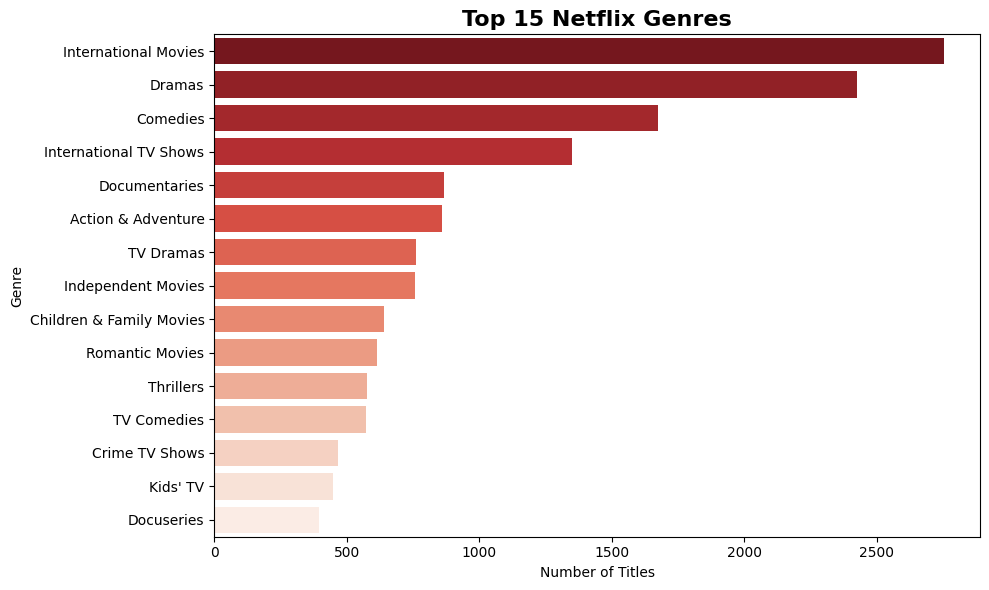

In [17]:
# Check if 'genre' column exists
if 'genre' in df.columns:
    all_genres = df['genre'].dropna().str.split(', ').explode()
    genre_counts = all_genres.value_counts().head(15)

   # Create a gradient color palette from light red to dark red
    colors = sns.color_palette("Reds", n_colors=len(genre_counts))[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=genre_counts.values,
        y=genre_counts.index,
        palette=colors  # gradient colors
    )

    plt.title('Top 15 Netflix Genres', fontsize=16, fontweight='bold')
    plt.xlabel('Number of Titles')
    plt.ylabel('Genre')
    plt.tight_layout()
    plt.show()

### Insights from Hypothesis 4: Most Popular Genres on Netflix

The genre analysis reveals important trends in Netflix’s content library:

- **International Movies** emerge as the most popular genre, reflecting Netflix’s strong investment in diverse global content.
- Other leading genres include Drama, Comedy, Thriller, and Documentary, highlighting a mix of popular entertainment and factual programming.
- The top 15 genres display a broad spectrum of content types, appealing to various viewer preferences across regions.
- The gradient bar chart clearly illustrates the prominence of International Movies, setting it apart from other genres.
- This suggests Netflix’s strategic focus on expanding international offerings to attract and retain subscribers worldwide.
- Understanding this genre popularity can help guide content curation and acquisition to match evolving audience interests.

Overall, the dominance of International Movies alongside other major genres demonstrates Netflix’s commitment to global and diverse storytelling.

---

# Conclusions and next step

### Conclusions

This analysis of the Netflix dataset has revealed several important insights into the platform's content strategy and distribution:

- **Content Growth Trends:** Netflix continues to expand its library steadily each year, with noticeable seasonal trends in monthly content additions. This suggests strategic timing for releases, possibly aligned with viewer demand cycles such as holidays or major events.
- **Content Type Distribution:** Movies constitute a larger proportion of new titles compared to TV programmes, reflecting Netflix's investment focus and audience preferences. However, TV shows have also shown consistent growth, indicating sustained interest in episodic content.
- **Geographic Distribution:** The United States dominates content production, but there is significant representation from other countries such as India, the United Kingdom, and South Korea. This diversity points to Netflix's global expansion strategy and localized content investments to attract regional audiences.
- **Genre Popularity:** International Movies rank as the top genre, highlighting Netflix’s push to diversify its catalog beyond traditional genres and appeal to a broad, multicultural audience. Popular genres like Dramas, Documentaries, and Comedies also feature prominently.
- **Data Limitations:** Some gaps in metadata, such as missing country or genre information for certain titles, restrict the depth of analysis. Additionally, the absence of user engagement metrics limits insights into content performance from a viewer perspective.

Overall, the data reflects Netflix’s adaptive content strategy, balancing quantity, variety, and global reach to maintain competitive advantage in the streaming market.

### Next Steps

To further enhance understanding and leverage the dataset effectively, the following next steps are recommended:

- **Data Enrichment:** Augment the dataset with additional variables such as user ratings, viewing statistics, and release platforms. Incorporating social media sentiment and critic reviews can also provide qualitative context.
- **Advanced Visualisations and Dashboards:** Create interactive dashboards with tools like Power BI or Tableau, allowing users to filter and drill down by year, country, genre, and content type for more tailored insights.
- **Time Series and Forecasting Analysis:** Employ statistical and machine learning models to forecast future content additions and trends, enabling proactive content strategy planning.
- **Audience Segmentation:** Analyse demographic and behavioural data (if available) to identify distinct viewer segments and their content preferences, facilitating targeted marketing and recommendation systems.
- **Natural Language Processing:** Use NLP techniques to analyse titles, descriptions, and reviews for sentiment, themes, and emerging trends in viewer interest.
- **Automation and Pipeline Development:** Develop automated ETL pipelines to regularly update the dataset and visualisations, ensuring insights stay current with Netflix’s evolving library.
- **Collaboration and Integration:** Integrate findings with business intelligence teams or Netflix’s internal data to align analytics efforts with strategic goals.

Implementing these steps will enable deeper, more actionable insights into Netflix's content ecosystem, ultimately supporting data-driven decisions for content acquisition, production, and personalized viewer experiences.
